Columns to be removed (4): ['d', 'j', 'x', 'z']


d:\VSCode ProjectsRepos\BINF-5007-Materials\Assignment 1\Scripts\data_preprocessor.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  messy_data_impute[col].fillna(messy_data_impute[col].mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1195
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                879 non-null    float64
 1   b                     1149 non-null   float64
 2   c                     1149 non-null   float64
 3   f                     1149 non-null   float64
 4   h                     1111 non-null   float64
 5   k                     1149 non-null   float64
 6   l                     1149 non-null   float64
 7   n                     965 non-null    float64
 8   t                     1063 non-null   float64
 9   v                     1069 non-null   float64
 10  w                     1032 non-null   float64
 11  a_normal              1149 non-null   int8   
 12  a_st-t abnormality    1149 non-null   int8   
 13  e_Hungary             1149 non-null   int8   
 14  e_Switzerland         1149 non-null   int8   
 15  e_VA Long Beach       1149

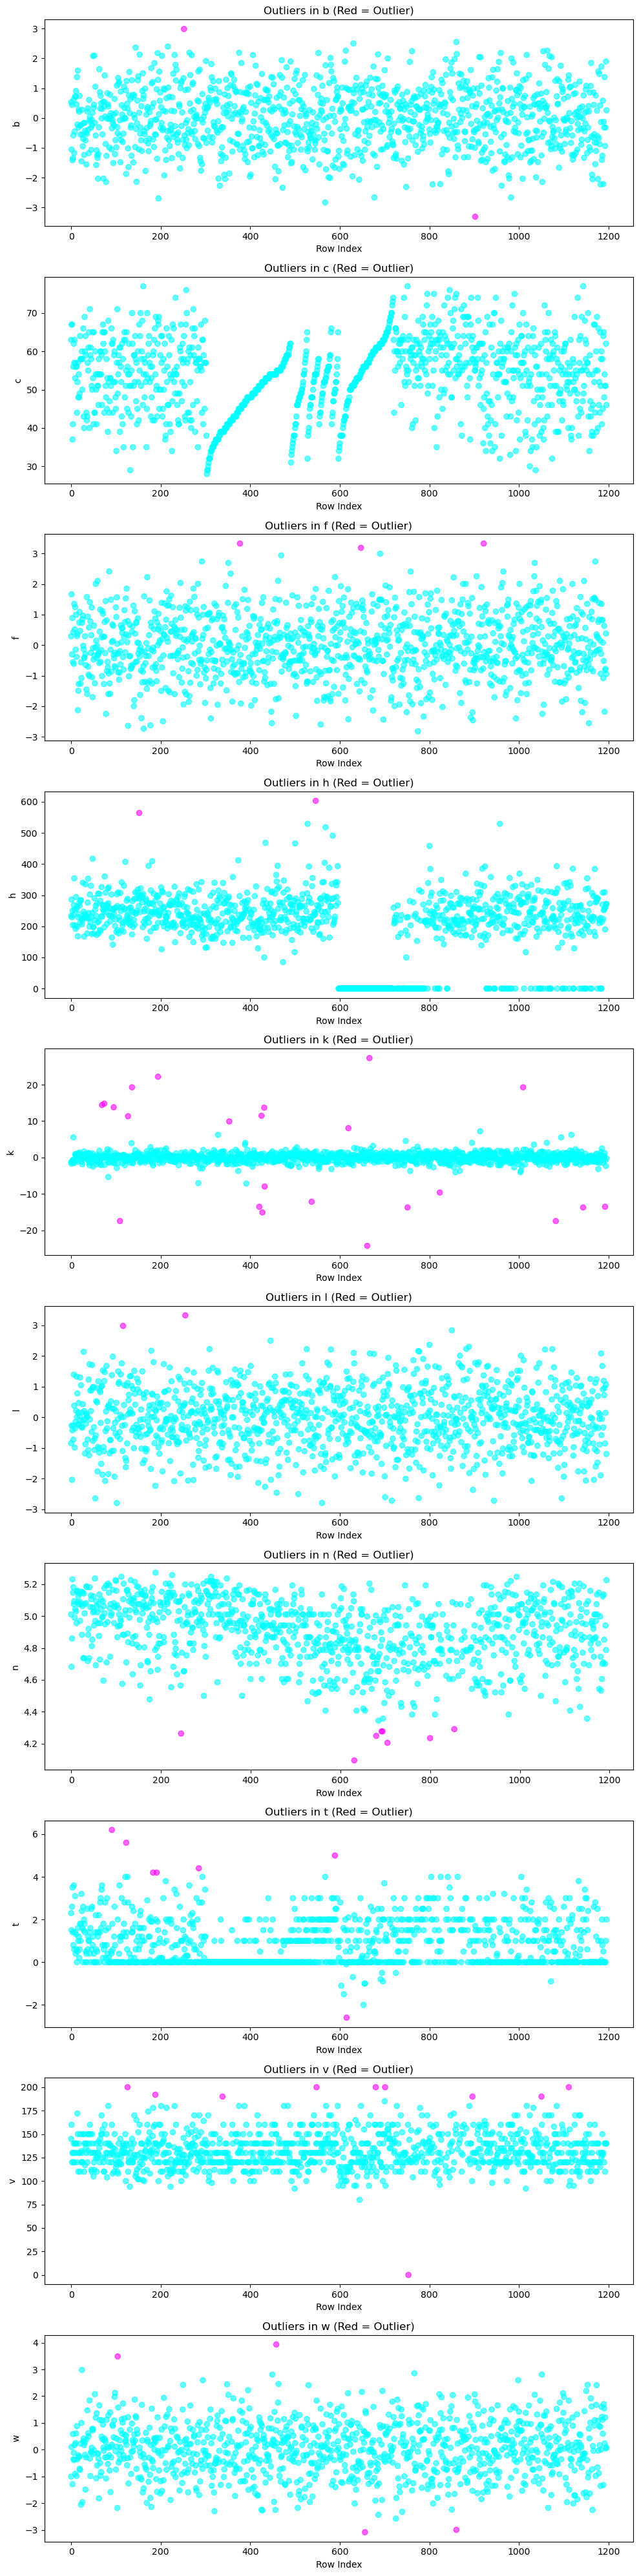

In [3]:
# Import necessary modules
import data_preprocessor as dp
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()
#clean_data.info()


# 2. Preprocess the data


clean_data = dp.remove_duplicates(clean_data)
clean_data = dp.remove_cols_percent_missing(clean_data, percent_missing= 50)
clean_data = dp.impute_missing_values(clean_data, strategy='mean')
clean_data = dp.remove_redundant_features(clean_data)
clean_data = dp.remove_outliers(clean_data)
clean_data = dp.normalize_data(clean_data)


clean_data.info()

# 3. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)

# 4. Train and evaluate the model
dp.simple_model(clean_data)